In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# since we need to keep a track of (x,y), we need to define the function given too

def func(x):
    
    if x < -1e10 or x > 1e10:
        raise ValueError("x is too large/small, risk of overflow.")
    
    if x<-0.1:
        return -x**3
    elif -0.1<= x < 3:
        return -3*x/100 - 1/500
    elif 3<= x < 5:
        return -(x - 31/10)**3 - 23/250
    else :
        return  1083/200 * (x - 6)**2 - 6183/500


# step 1 derive inhand derivatives and implement in python/numpy

def derivative(x):
    
    if x<-0.1:
        return -3 * x**2
    elif -0.1<= x < 3:
        return (-3/100)
    elif 3<= x < 5:
        return -3*(x-31/10)**2
    else :
        return (1083/100*(x-6))

# step 2 compute gradient for T iterations
def gradient_desc(x_initial,learning_rate,T):
    
    x=x_initial
    data_record =[]
    
    for t in range(T):
        
        try:
            data_record.append((x, func(x)))
            x -= learning_rate * derivative(x)
        except OverflowError:
            print(f"Overflow error at iteration {t}, x = {x}")
            break
        except ValueError as e:
            print(f"Value error: {e} at iteration {t}, x = {x}")
            break
    
        
    return data_record




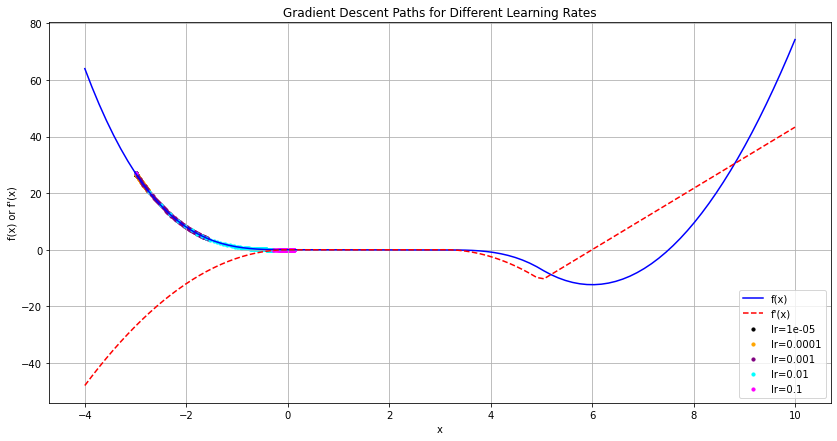

In [3]:
# we have a set of learning rates

#learning_rates = [1e-3, 1e-2, 1e-1, 1e0,1e1]
learning_rates = [1e-5,1e-4,1e-3, 1e-2, 1e-1]

# setting initial parameters given

x0 = -3   # initial value of x
T=100     # number of iterations over which I need to perform gradient descent

full_record = {}  # dictionary so that I can track values at different iterations
for rate in learning_rates:
    full_record[rate] = gradient_desc(x0,rate,T)
    
    
# Next step  - Plot f, ∇f, as well as superimposed dots that show the sequence ((x(1), y(1)), . . . , (x(T), y(T)))
#              of gradient descent
    
x_values = np.linspace(-4, 10, 100)  # random values keeping in mine range of x provided
f_values = np.array([func(x) for x in x_values])  # plotting function
df_values = np.array([derivative(x) for x in x_values])  # plotting function derivative

plt.figure(figsize=(14, 7))

        
plt.plot(x_values, f_values, label='f(x)', color='blue')
# Plot the derivative f'(x)
plt.plot(x_values, df_values, label="f'(x)", color='red', linestyle='--')        
    


# Plot gradient descent paths for each learning rate
colors = ['black', 'orange', 'purple', 'cyan', 'magenta']
for i, (rate, data_record) in enumerate(full_record.items()):
    data_record = np.array(data_record)
    plt.scatter(data_record[:, 0], data_record[:, 1], color=colors[i], label=f'lr={rate}', s=10) 
    

plt.xlabel('x')
plt.ylabel('f(x) or f\'(x)')
plt.title('Gradient Descent Paths for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()
    

In [7]:
# we need to find the learning rate for which we attain min f(x)

def optimal_lr(rates,x_initial,T):
    full_record = {}
    opt_rate= None
#     final_func=[]
    min_func_value = float('inf')  # Initialize with infinity
    for rate in rates:
        
        
        hist = gradient_desc(x_initial,rate,T)
        full_record[rate] = hist

        if hist:
            # Find the minimum function value in the entire history
            current_min_func_value = min(value[1] for value in hist)  # Assuming hist is [(x, f(x)), ...]

            # Update the optimal learning rate if a lower function value is found
            if current_min_func_value < min_func_value:
                min_func_value = current_min_func_value
                opt_rate = rate


    #rint(final_func)
    return opt_rate,full_record

In [21]:
#testing_learning_rates = np.logspace(-7, 0.55, 20)  # From 1e-5 to 1
#testing_learning_rates = np.logspace(-4, 0.26, 5)

testing_learning_rates = np.linspace(0.22, 0.25, 50)

# Find the optimal learning rate
optimal_rate, histories = optimal_lr(testing_learning_rates,-3,100)



0.3333

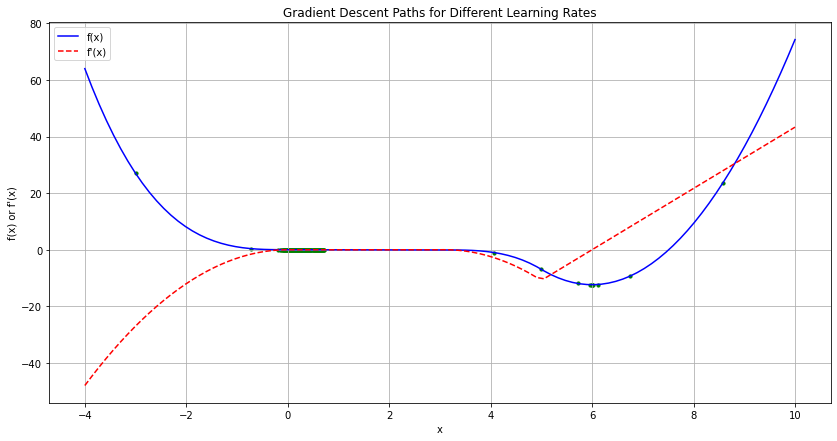

In [25]:
opt_rec=gradient_desc(x0,optimal_rate,T)

opt_rec = np.array(opt_rec)
plt.figure(figsize=(14, 7))
        
plt.plot(x_values, f_values, label='f(x)', color='blue')
# Plot the derivative f'(x)
plt.plot(x_values, df_values, label="f'(x)", color='red', linestyle='--')  
plt.scatter(opt_rec[:, 0], opt_rec[:, 1], color='green', s=10) 
plt.xlabel('x')
plt.ylabel('f(x) or f\'(x)')
plt.title('Gradient Descent Paths for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
import numpy as np

def gradient_descent_with_decay(x0,gradient_func,function, initial_lr=0.245, decay_rate=0.9, decay_steps=100, max_iter=1000, tolerance=1e-6):
    """
    Perform gradient descent with exponential decay of the learning rate.

    Parameters:
    - gradient_func: The gradient of the function f(x) to be minimized.
    - initial_lr: Initial learning rate.
    - decay_rate: The rate of decay for the learning rate.
    - decay_steps: Number of steps after which the learning rate is decayed.
    - max_iter: Maximum number of iterations.
    - tolerance: Tolerance for stopping criterion.

    Returns:
    - x_optimal: The point where f(x) is minimized.
    - history: A list of (x, f(x)) values for each iteration.
    """
    x = x0  # Starting point (you can choose an appropriate initial value)
    lr = initial_lr
    history = []
    func_hist=[]
    for i in range(max_iter):
        grad = gradient_func(x)
        x -= lr * grad
        history.append((x, grad))
        func_hist.append((x,function(x)))

        # Exponential decay of the learning rate
        if i % decay_steps == 0 and i != 0:
            lr *= decay_rate

        # Check for convergence
        if abs(grad) < tolerance:
            print(f"Converged in {i} iterations.")
            break

    return x, history,lr,func_hist

# Example usage with f(x) = x^2 (a simple quadratic function)


x_optimal, history,opt_r, hist= gradient_descent_with_decay(derivative,func)
# print(f"Optimal x: {x_optimal}")
# print(f"Optimal lr: {opt_r}")
hist=np.array(hist)


Converged in 431 iterations.
[ 3.615      -0.22859088]


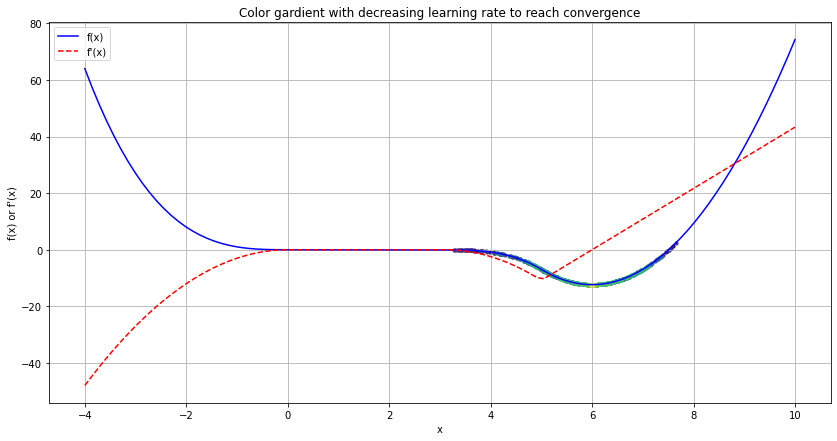

In [40]:
x_values = np.linspace(-4, 10, 100)  # random values keeping in mine range of x provided
f_values = np.array([func(x) for x in x_values])  # plotting function
df_values = np.array([derivative(x) for x in x_values])  # plotting function derivative

plt.figure(figsize=(14, 7))
        
plt.plot(x_values, f_values, label='f(x)', color='blue')
# Plot the derivative f'(x)
plt.plot(x_values, df_values, label="f'(x)", color='red', linestyle='--')  

colors = plt.cm.viridis(np.linspace(0, 1, hist.shape[0]))
for i in range(hist.shape[0]):
    plt.scatter(hist[i, 0], hist[i, 1], color=colors[i], s=10)
#plt.scatter(hist[:, 0], hist[:, 1], colors, s=10)
plt.xlabel('x')
plt.ylabel('f(x) or f\'(x)')
plt.title('Color gardient with decreasing learning rate to reach convergence')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
# # Plot f(x) and its derivative f'(x)
# x_values = np.linspace(-4, 7, 500)
# f_values = np.array([func(x) for x in x_values])
# df_values = np.array([derivative(x) for x in x_values])

# plt.figure(figsize=(14, 7))

# # Plot the function f(x)
# plt.plot(x_values, f_values, label='f(x)', color='blue')
# # Plot the derivative f'(x)
# plt.plot(x_values, df_values, label="f'(x)", color='red', linestyle='--')

# # Plot gradient descent paths for each learning rate
# colors = plt.cm.viridis(np.linspace(0, 1, len(full_record)))
# for i, (rate, data_record) in enumerate(full_record.items()):
#     data_record = np.array(data_record)
#     plt.scatter, color=colors[i], label=f'lr={rate:.1e}', s=10) # round up

# plt.xlabel('x')
# plt.ylabel('f(x) or f\'(x)')
# plt.title('Gradient Descent Paths for Different Learning Rates')
# plt.legend()
# plt.grid(True)
# plt.show()


NameError: name 'np' is not defined

In [88]:
np.save("optimal_lr.npy",optimal_rate)
np.save("training_hist_optrate.npy",histories)
